<a href="https://colab.research.google.com/github/antidude900/pytorch_learning/blob/main/03_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu121
0.20.1+cu121


In [3]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform= None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.5MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 172kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.16MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 23.4MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data),len(test_data)

(60000, 10000)

In [5]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [6]:
image,label = train_data[59999]
image,image.shape,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

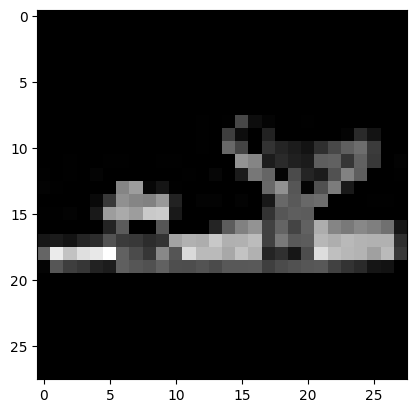

In [7]:
import matplotlib.pyplot as plt
plt.imshow(image.squeeze(),cmap="gray")

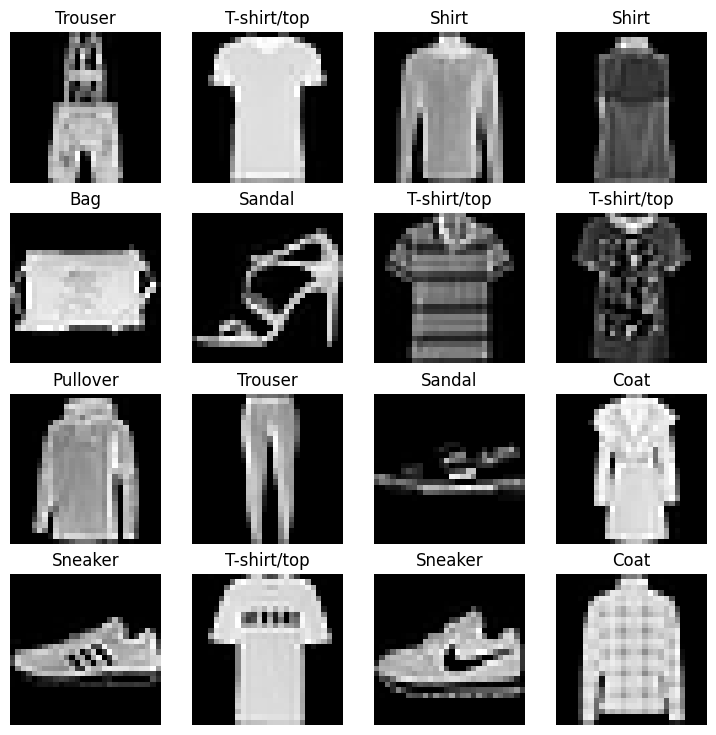

In [8]:
fig = plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx = torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title((train_data.classes)[label])
  plt.axis(False)

In [9]:
#For representing a picture, we use color * height * width 3d tensor.
"""For a grayscale picture, we are using a 1 * 28 * 28 3D tensor.
You might get confused for why we are using 1 for color length though grayscale images are made from colors between white and black.
Well the more the color is white, the less the color is black.
So as there are only two options which are related to each other, we can use only one to describe the other too!
So for each width of each height, we give value between 0 and 1 to describe the intensity of that pixel.
The more closer to 1 the more white and the more closer to 0 the more black

For a colorful picture, we are using a  3 * 28 * 28 3D tensor.
Here, the colors are stored in 3 different blocks. One block for red color, one for blue color and one for green.
Each block stores the intensity of its corresponding color for each widght of each height. The value ranges from 0-255"""


'For a grayscale picture, we are using a 1 * 28 * 28 3D tensor.\nYou might get confused for why we are using 1 for color length though grayscale images are made from colors between white and black.\nWell the more the color is white, the less the color is black.\nSo as there are only two options which are related to each other, we can use only one to describe the other too!\nSo for each width of each height, we give value between 0 and 1 to describe the intensity of that pixel.\nThe more closer to 1 the more white and the more closer to 0 the more black\n\nFor a colorful picture, we are using a  3 * 28 * 28 3D tensor.\nHere, the colors are stored in 3 different blocks. One block for red color, one for blue color and one for green.\nEach block stores the intensity of its corresponding color for each widght of each height. The value ranges from 0-255'

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = DataLoader(dataset=test_data,batch_size=BATCH_SIZE,shuffle=False)

train_features_batch,train_labels_batch = next(iter(train_dataloader))
test_features_batch,test_labels_batch = next(iter(test_dataloader))

In [11]:
train_features_batch.shape,train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [12]:
class FashionModelV0(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)


In [13]:
model_0 = FashionModelV0(
    input_shape = 28*28,
    hidden_units = 20,
    output_shape = 10
)
model_0

FashionModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=20, bias=True)
    (2): Linear(in_features=20, out_features=10, bias=True)
  )
)

In [14]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper function.py already exists!")
else:
  print("Downloading helper_functions.py")
  request  =  requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)


In [15]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.001)

In [16]:
from timeit import default_timer as timer

def print_train_time(start,end,device):
  time  = end - start
  print(f"Time taken to train on {device} is {time:.3f} seconds")
  return time

In [17]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs=3
TOTAL_TRAIN_BATCHES = len(train_dataloader)
TOTAL_TEST_BATCHES = len(test_dataloader)

TRAIN_DATASET_SIZE = len(train_dataloader.dataset)



for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n------")

  train_loss ,train_acc = 0,0

  for batch,(X,y) in enumerate(train_dataloader):
    model_0.train()

    y_pred = model_0(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y,y_pred = y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch%500 ==0:
      print(f"Looked at {batch*BATCH_SIZE}/{TRAIN_DATASET_SIZE} samples")


  train_loss /= TOTAL_TRAIN_BATCHES
  train_acc /= TOTAL_TRAIN_BATCHES

  test_loss,test_acc = 0,0

  model_0.eval()
  with torch.inference_mode():
    for X_test,y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss +=loss_fn(test_pred,y_test)
      test_acc += accuracy_fn(y_true = y_test, y_pred = test_pred.argmax(dim=1))

    test_loss /= TOTAL_TEST_BATCHES
    test_acc /=TOTAL_TEST_BATCHES

  print(f"\nTrain loss:{train_loss:.4f}, Train_acc:{train_acc:.4f} | Test loss:{test_loss:.4f}, Test_acc:{test_acc:.4f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

Train loss:0.5807, Train_acc:79.9733 | Test loss:0.5027, Test_acc:82.6178
Epoch:1
------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

Train loss:0.4495, Train_acc:84.3867 | Test loss:0.4678, Test_acc:83.1969
Epoch:2
------
Looked at 0/60000 samples
Looked at 16000/60000 samples
Looked at 32000/60000 samples
Looked at 48000/60000 samples

Train loss:0.4301, Train_acc:84.9783 | Test loss:0.4619, Test_acc:83.7061
Time taken to train on cpu is 31.118 seconds


In [18]:
def eval_model(model,
               data_loader,
               loss_fn,
               accuracy_fn):

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn
)
model_0_results

{'model_name': 'FashionModelV0',
 'model_loss': 0.4619075655937195,
 'model_acc': 83.70607028753993}

In [19]:
device  = "cuda" if torch.cuda.is_available() else "gpu"
device

'cuda'

In [20]:
class FashionModelV1(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU(),
    )

  def forward(self,x):
    return self.layer_stack(x)


In [21]:
torch.manual_seed(42)
model_1 = FashionModelV1(
    input_shape = 28*28,
    hidden_units = 20,
    output_shape = 10
).to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [22]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),lr=0.001)

In [23]:
def train_step(model,data_loader,loss_fn,optimizer,accuracy_fn,device):

  train_loss ,train_acc = 0,0

  for batch,(X,y) in enumerate(data_loader):
    X,y = X.to(device),y.to(device)

    model.train()

    y_pred = model(X)

    loss = loss_fn(y_pred,y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y,y_pred = y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"\nTrain loss:{train_loss:.4f} | Train_acc:{train_acc:.4f}%")


In [24]:
def test_step(model,
              data_loader,
              loss_fn,
              accuracy_fn,
              device):


  test_loss ,test_acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y = X.to(device),y.to(device)

      test_pred = model(X)

      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true = y,y_pred = test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"\nTest loss:{test_loss:.4f} | Test_acc:{test_acc:.4f}%")



In [25]:
train_time_start = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch:{epoch}\n------")

  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end= timer()
total_train_time_model_0 = print_train_time(start=train_time_start,
                                            end=train_time_end,
                                            device = str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch:0
------

Train loss:0.9870 | Train_acc:66.8667%

Test loss:0.8877 | Test_acc:68.9397%
Epoch:1
------

Train loss:0.8408 | Train_acc:70.3683%

Test loss:0.8454 | Test_acc:69.9780%
Epoch:2
------

Train loss:0.6963 | Train_acc:76.5783%

Test loss:0.6548 | Test_acc:78.6042%
Time taken to train on cpu is 34.670 seconds


In [26]:
def eval_model(model,
               data_loader,
               loss_fn,
               accuracy_fn,
               device=device):

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:

            X,y = X.to(device),y.to(device)
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [27]:
model_1_results =  eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,device=device
)
model_1_results

{'model_name': 'FashionModelV1',
 'model_loss': 0.6548063158988953,
 'model_acc': 78.60423322683707}

In [28]:
model_0_results

{'model_name': 'FashionModelV0',
 'model_loss': 0.4619075655937195,
 'model_acc': 83.70607028753993}

In [48]:
class FashionModelV2(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )

    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),

        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
    )

    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=hidden_units*7*7,
                out_features=output_shape),

    )

  def forward(self,x):
      x = self.conv_block_1(x)
      print(x.shape)
      x = self.conv_block_2(x)
      print(x.shape)
      x = self.classifier(x)
      print(x.shape)
      return x


In [49]:
torch.manual_seed(42)
model_2 = FashionModelV2(input_shape=1,
                         hidden_units=10,
                         output_shape=10)


In [50]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.01)